### Not yet tested ###

In [4]:
from qiskit import QuantumCircuit

def get_circuit(angle_left, angle_right):
    circ = QuantumCircuit(2)
    circ.h(0)
    circ.cx(0, 1)
    circ.x(1)
    circ.barrier()
    circ.ry(angle_left, 0)
    circ.ry(angle_right, 1)
    circ.measure_all()
    display(circ.draw(output='mpl'))
    return circ

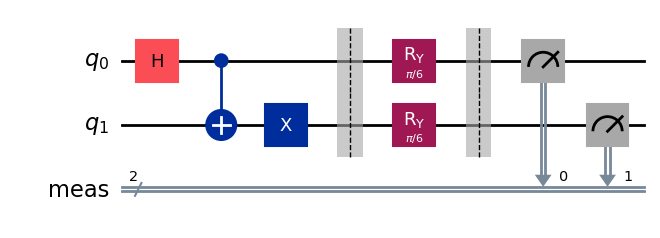

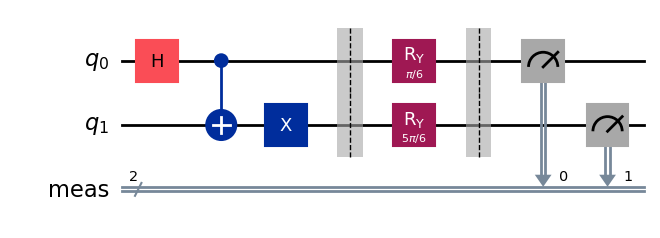

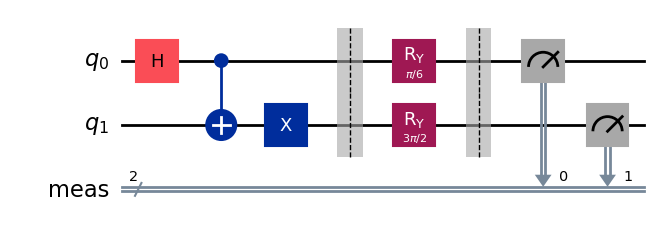

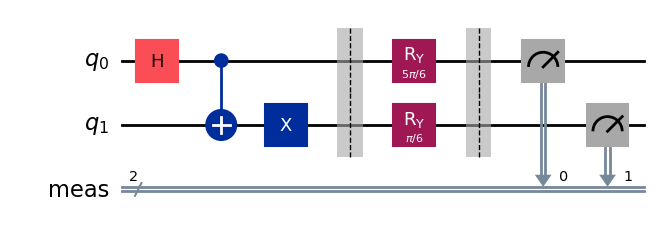

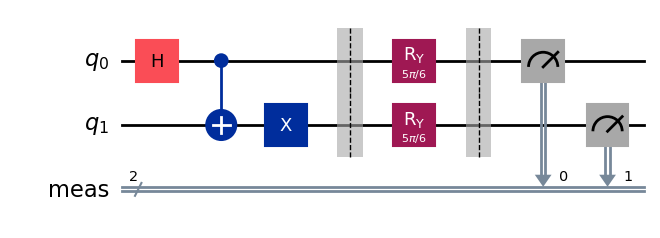

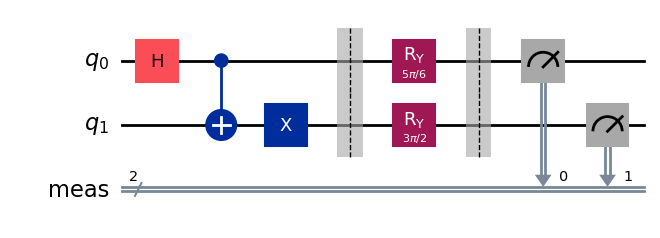

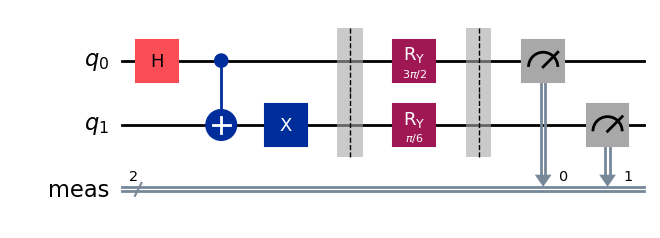

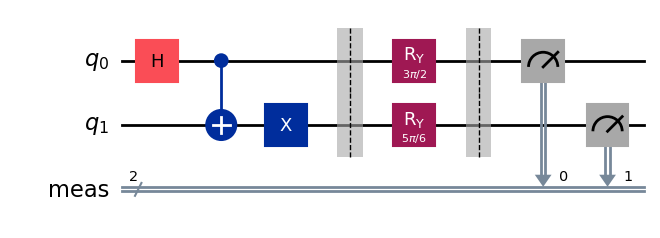

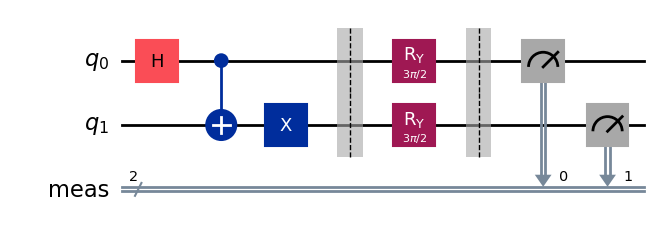

In [5]:
from math import pi

northwest = pi / 6
southwest = 5 * pi / 6
east = 9 * pi / 6
directions = [northwest, southwest, east]

circuits = []

for dir_left in directions:
    for dir_right in directions:
        circuits.append(get_circuit(dir_left, dir_right))

In [9]:
from qiskit_ibm_provider import IBMProvider
from qiskit import transpile

provider = IBMProvider()
device = provider.get_backend('ibmq_manila')

shots = 100

#job = execute(circuits, backend=device, shots=shots, memory=True)
new_circuits = transpile(circuits, backend=device)
job = device.run(new_circuits, shots=shots, memory=True)

result = job.result()



AccountNotFoundError: 'No default ibm_quantum account saved.'

In [ ]:
disagree = 0
for circ in circuits:
    memory = result.get_memory(circ)
    for meas in memory:
        if meas[0] != meas[1]:
            disagree += 1

print('\nProbability of disagreement: ', end='')
print(disagree / (9 * shots))